# Gastro-Intestinal Disease detection

---



## Loading the data from Kaggle

In [1]:
from google.colab import files

# Uploading the kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# Moving the uploaded kaggle.json file to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Downloading the dataset from kaggle
!kaggle datasets download -d meetnagadia/kvasir-dataset

 99% 1.14G/1.15G [00:11<00:00, 116MB/s]
100% 1.15G/1.15G [00:11<00:00, 105MB/s]


In [4]:
# Unzipping the downloaded dataset
!unzip -q kvasir-dataset.zip -d kvasir-dataset

In [5]:
# Importing the required libraries
import os
import glob
import numpy as np
import pandas as pd

In [6]:
# Specifying the path to the dataset directory
dataset_dir = "/content/kvasir-dataset/kvasir-dataset"

In [7]:
# Defining a function to get dataset categories and the number of files in each category
def get_data_categories(dataset_dir):
    categories = []
    for folder_name in os.listdir(dataset_dir):
        if os.path.isdir(os.path.join(dataset_dir, folder_name)):
            nbr_files = len(glob.glob(os.path.join(dataset_dir, folder_name, "*.jpg")))
            categories.append(np.array([folder_name, nbr_files]))

    categories.sort(key=lambda a: a[0])
    cat = np.array(categories)

    return list(cat[:, 0]), list(cat[:, 1])

In [8]:
# Getting categories and number of files
categories, nbr_files = get_data_categories(dataset_dir)

In [9]:
# Creating the DataFrame
df = pd.DataFrame({"category": categories, "number_of_files": nbr_files})
print("Number of categories: ", len(categories))
df

Number of categories:  8


,category,number_of_files
0,dyed-lifted-polyps,500
1,dyed-resection-margins,500
2,esophagitis,500
3,normal-cecum,500
4,normal-pylorus,500
5,normal-z-line,500
6,polyps,500
7,ulcerative-colitis,500


## Data Preprocessing

In [10]:
# Creating the set of features X as well as the labels y
import cv2

def create_dataset(datadir, categories, img_wid, img_high):
    X, y = [], []
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                print(f"Loading image: {img_path}")

                img_array = cv2.imread(img_path)
                img_resize_rgb = cv2.resize(img_array, (img_wid, img_high))

                X.append(img_resize_rgb)
                y.append(class_num)

            except Exception as e:
                print(f"Error loading image: {img_path}, {e}")

    y = np.array(y)
    X = np.array(X).reshape(y.shape[0], img_wid, img_wid, 3)
    return X, y

img_wid, img_high = 100, 100
X, y = create_dataset(dataset_dir, categories, img_wid, img_high)

print(f"X: {X.shape}")
print(f"y: {y.shape}")

Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/b17c4984-2819-4281-893e-850c3117261e.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/5d421dba-a4c3-4bb9-935d-a10eba1c7a8a.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/8db29cc0-8f98-4986-b115-9901b33f3114.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/24210ceb-3a29-4386-a501-812f337ef6b6.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/7432a33e-c4db-48b3-a1fb-0ebb817a3c79.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/b5e24486-2569-4192-9504-c7423d69dbe4.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/98088dcb-66d7-4d6b-bcc4-9d3284d53e7f.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/fda47e17-cfb3-4fc1-8d67-c423b8c2d192.jpg
Loading image: /content/kvasir-dataset/kvasir-dataset/dyed-lifted-polyps/02c10865-9d23-4

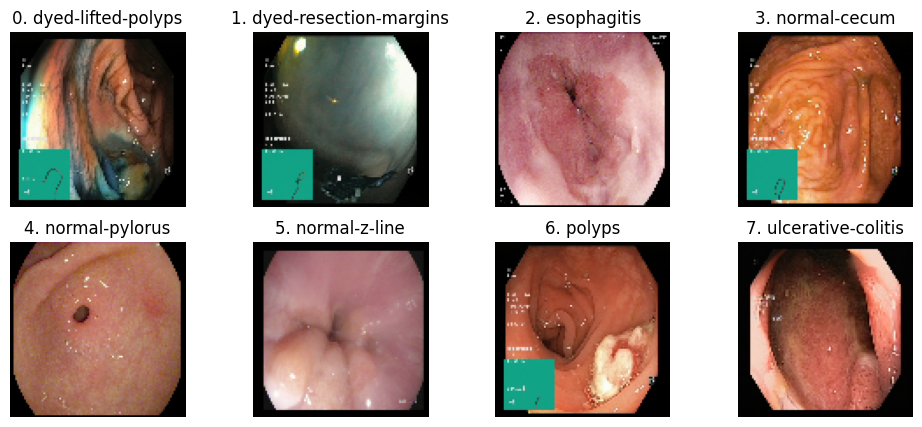

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Displaying random images for each category
plt.figure(figsize=(12, 5))
for i, category in enumerate(categories):
    plt.subplot(2, 4, i + 1)

    # Getting indices of images for the current category
    category_indices = np.where(y == i)[0]

    # Randomly selecting an image index for the current category
    idx = np.random.choice(category_indices)

    # Displaying the image
    plt.imshow(X[idx][:, :, ::-1])
    plt.title(f"{i}. {category}")
    plt.axis("off")

plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Converting y to scaler format
Y = np.reshape(y, (len(y), 1))

# Splitting dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (3200, 100, 100, 3)
y_train: (3200, 1)
X_test: (800, 100, 100, 3)
y_test: (800, 1)


In [13]:
# Creating the validation set
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)
x_test = X_test

# Dimensions of the dataset
print(f"x_train:{x_train.shape},  y_train:{y_train.shape}")
print(f"x_train:{x_val.shape},  y_train:{y_val.shape}")
print(f"x_test:{x_test.shape},  y_test:{y_test.shape}")

x_train:(2240, 100, 100, 3),  y_train:(2240, 1)
x_train:(960, 100, 100, 3),  y_train:(960, 1)
x_test:(800, 100, 100, 3),  y_test:(800, 1)


In [14]:
from tensorflow.keras.utils import to_categorical

# OneHot Encoding the Prediction
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Verifying the dimensions after one hot encoding
print(f"x_train:{x_train.shape},  y_train:{y_train.shape}")
print(f"x_train:{x_val.shape},  y_train:{y_val.shape}")
print(f"x_train:{x_test.shape},  y_train:{y_test.shape}")

x_train:(2240, 100, 100, 3),  y_train:(2240, 8)
x_train:(960, 100, 100, 3),  y_train:(960, 8)
x_train:(800, 100, 100, 3),  y_train:(800, 8)


In [15]:
from keras.preprocessing.image import ImageDataGenerator

# Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)

# Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

Now we can focus on building a suitable model for disease detection.

## Model Building

In [16]:
# Importing the required libraries
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau

In [17]:
# Defining function to create and compile models
def create_and_compile_model(base_model, input_shape, num_classes):
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', input_dim=input_shape))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compiling the model
    sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [18]:
# Defining hyperparameters
batch_size = 128
epochs = 100
learn_rate = 0.001

# Learning Rate Annealer
lrr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.01, patience=3, min_lr=1e-5)

In [19]:
# Load or create VGG16 model
if os.path.isfile("./saved_model/vgg16_model.h5"):
    base_model_vgg16 = load_model("./saved_model/vgg16_model.h5")
else:
    base_model_vgg16 = VGG16(include_top=False, weights="imagenet", input_shape=(100, 100, 3), classes=y_train.shape[1])
    base_model_vgg16.save("./saved_model/vgg16_model.h5")

58889256/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Load or create ResNet50 model
if os.path.isfile("./saved_model/resnet50_model.h5"):
    base_model_resnet50 = load_model("./saved_model/resnet50_model.h5")
else:
    base_model_resnet50 = ResNet50(include_top=False, weights="imagenet", input_shape=(100, 100, 3), classes=y_train.shape[1])
    base_model_resnet50.save("./saved_model/resnet50_model.h5")

94765736/94765736 [==============================] - 1s 0us/step


In [21]:
# Load or create MobileNetV2 model
if os.path.isfile("./saved_model/mobilenetv2_model.h5"):
    base_model_mobilenetv2 = load_model("./saved_model/mobilenetv2_model.h5")
else:
    base_model_mobilenetv2 = MobileNetV2(include_top=False, weights="imagenet", input_shape=(100, 100, 3), classes=y_train.shape[1])
    base_model_mobilenetv2.save("./saved_model/mobilenetv2_model.h5")

9406464/9406464 [==============================] - 0s 0us/step


In [22]:
# Creating and compiling models
model_vgg16 = create_and_compile_model(base_model_vgg16, 512, y_train.shape[1])
model_resnet50 = create_and_compile_model(base_model_resnet50, 2048, y_train.shape[1])
model_mobilenetv2 = create_and_compile_model(base_model_mobilenetv2, 1280, y_train.shape[1])

In [23]:
# Training models
history_vgg16 = model_vgg16.fit(x_train, y_train, epochs=epochs, steps_per_epoch=x_train.shape[0] // batch_size,
                                validation_data=(x_val, y_val), callbacks=[lrr], verbose=1)

history_resnet50 = model_resnet50.fit(x_train, y_train, epochs=epochs, steps_per_epoch=x_train.shape[0] // batch_size,
                                      validation_data=(x_val, y_val), callbacks=[lrr], verbose=1)

history_mobilenetv2 = model_mobilenetv2.fit(x_train, y_train, epochs=epochs, steps_per_epoch=x_train.shape[0] // batch_size,
                                            validation_data=(x_val, y_val), callbacks=[lrr], verbose=1)

Epoch 1/100
17/17 [==============================] - 36s 973ms/step - loss: 3.1916 - accuracy: 0.1424 - val_loss: 2.0574 - val_accuracy: 0.2010 - lr: 0.0010
Epoch 2/100
17/17 [==============================] - 7s 425ms/step - loss: 2.0455 - accuracy: 0.1679 - val_loss: 1.9679 - val_accuracy: 0.1969 - lr: 0.0010
Epoch 3/100
17/17 [==============================] - 7s 423ms/step - loss: 2.0371 - accuracy: 0.1929 - val_loss: 1.9777 - val_accuracy: 0.1365 - lr: 0.0010
Epoch 4/100
17/17 [==============================] - 7s 426ms/step - loss: 1.9407 - accuracy: 0.2228 - val_loss: 1.8907 - val_accuracy: 0.2281 - lr: 0.0010
Epoch 5/100
17/17 [==============================] - 7s 430ms/step - loss: 1.7784 - accuracy: 0.3281 - val_loss: 1.6793 - val_accuracy: 0.3708 - lr: 0.0010
Epoch 6/100
17/17 [==============================] - 7s 433ms/step - loss: 1.7663 - accuracy: 0.3183 - val_loss: 1.4192 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/100
17/17 [==============================] - 7s 438ms/s

## Model Evaluation

In [24]:
# Evaluating the VGG16 model on the test set
score_vgg16 = model_vgg16.evaluate(x_test, y_test, verbose=0)
print("VGG16 Test loss:", round(score_vgg16[0], 3))
print("VGG16 Test accuracy:", round(score_vgg16[1], 3))

VGG16 Test loss: 0.818
VGG16 Test accuracy: 0.701


In [25]:
# Evaluate the ResNet50 model on the test set
score_resnet50 = model_resnet50.evaluate(x_test, y_test, verbose=0)
print("ResNet50 Test loss:", round(score_resnet50[0], 3))
print("ResNet50 Test accuracy:", round(score_resnet50[1], 3))

ResNet50 Test loss: 0.594
ResNet50 Test accuracy: 0.845


In [26]:
# Evaluate the MobileNetV2 model on the test set
score_mobilenetv2 = model_mobilenetv2.evaluate(x_test, y_test, verbose=0)
print("MobileNetV2 Test loss:", round(score_mobilenetv2[0], 3))
print("MobileNetV2 Test accuracy:", round(score_mobilenetv2[1], 3))

MobileNetV2 Test loss: 0.552
MobileNetV2 Test accuracy: 0.805


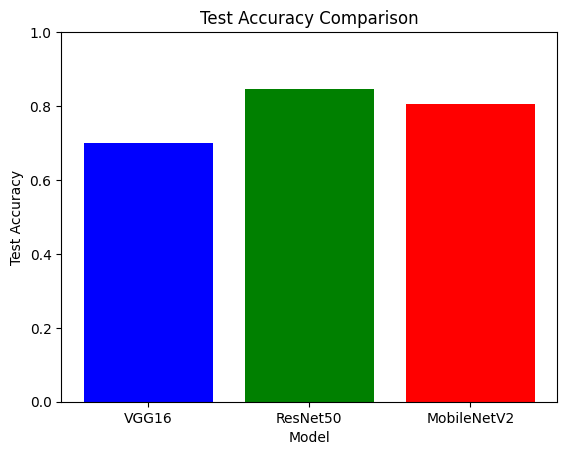

In [28]:
# Test scores for each model
test_scores = [score_vgg16[1], score_resnet50[1], score_mobilenetv2[1]]
model_names = ['VGG16', 'ResNet50', 'MobileNetV2']

# Plotting the bar chart
plt.bar(model_names, test_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

Clearly the ResNet50 model performs the best with 84.5% accuracy.

25/25 [==============================] - 1s 14ms/step


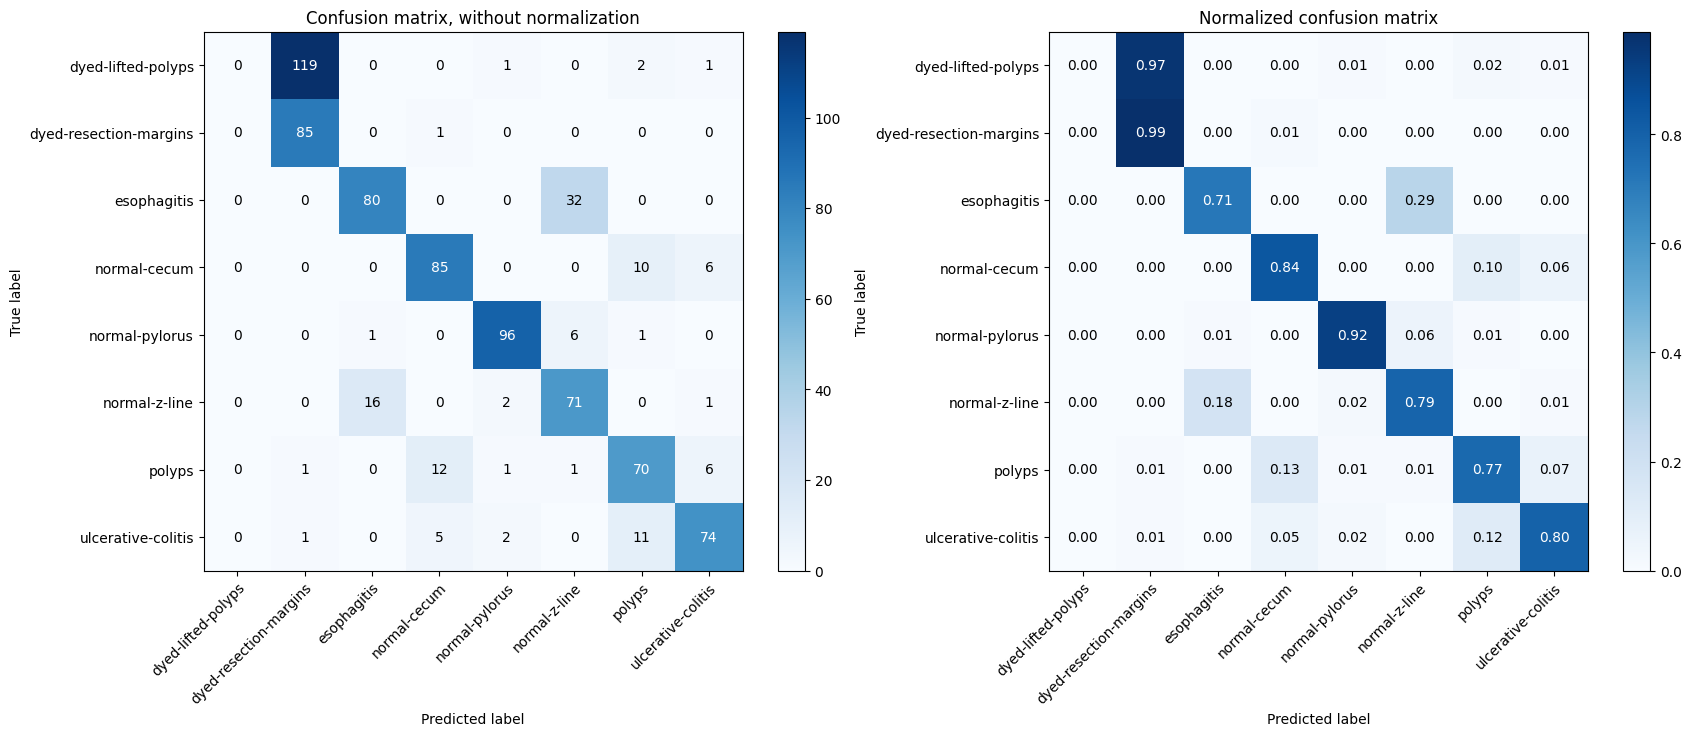

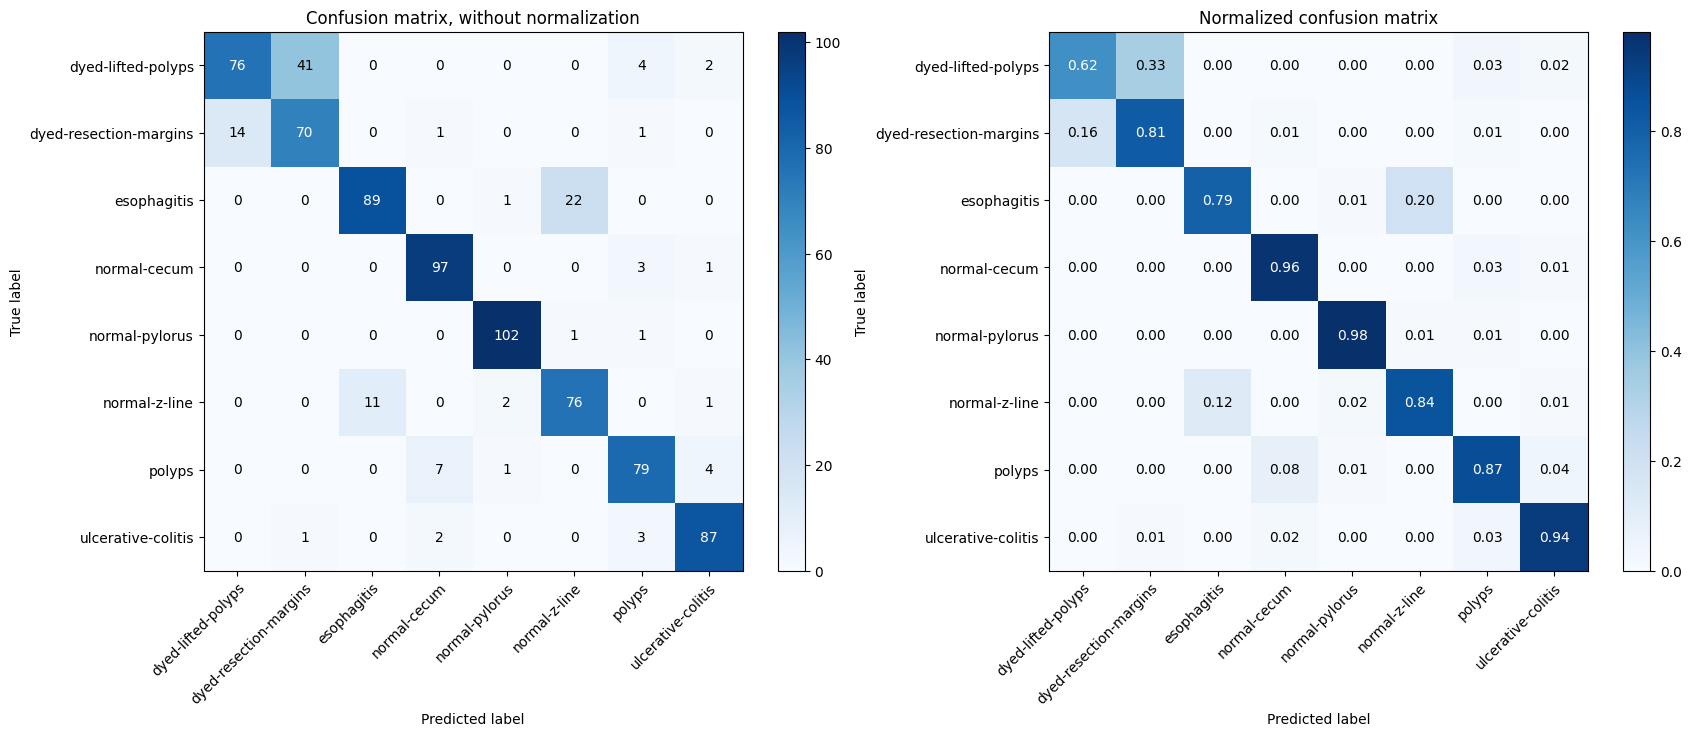

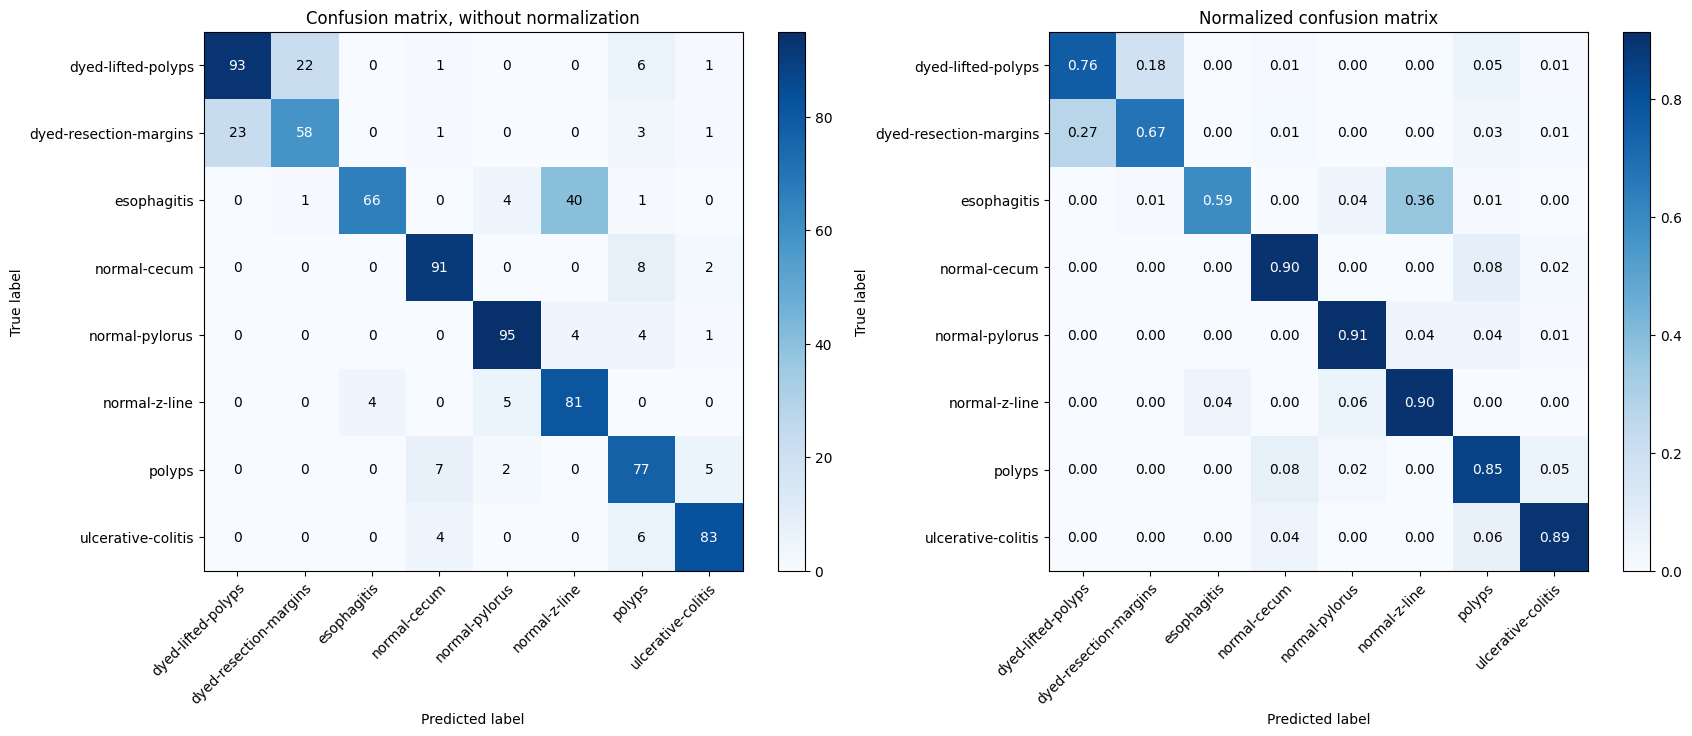

In [29]:
from sklearn.metrics import confusion_matrix

# Function to create the confusion matrix plot
def cm_plt(ax, cm, classes, cmap, title, normalize):
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel="True label",
        xlabel="Predicted label",
    )

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                format(cm[i, j], fmt),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    return ax

# Function to plot confusion matrix
def plt_confusion_mat(cm, classes, fig_size, cmap=plt.cm.Blues):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=fig_size)
    ax1 = cm_plt(
        ax1,
        cm,
        classes,
        cmap,
        title="Confusion matrix, without normalization",
        normalize=False,
    )

    cmn = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    ax2 = cm_plt(
        ax2,
        cmn,
        classes,
        cmap,
        title="Normalized confusion matrix",
        normalize=True,
    )

# Evaluate and plot confusion matrix for each model
# Model 1: VGG16
y_pred_vgg16 = np.argmax(model_vgg16.predict(x_test), axis=1)
conf_matrix_vgg16 = confusion_matrix(np.argmax(y_test, axis=1), y_pred_vgg16)
plt_confusion_mat(conf_matrix_vgg16, classes=categories, fig_size=(20, 7))

# Model 2: ResNet50
y_pred_resnet50 = np.argmax(model_resnet50.predict(x_test), axis=1)
conf_matrix_resnet50 = confusion_matrix(np.argmax(y_test, axis=1), y_pred_resnet50)
plt_confusion_mat(conf_matrix_resnet50, classes=categories, fig_size=(20, 7))

# Model 3: MobileNetV2
y_pred_mobilenetv2 = np.argmax(model_mobilenetv2.predict(x_test), axis=1)
conf_matrix_mobilenetv2 = confusion_matrix(np.argmax(y_test, axis=1), y_pred_mobilenetv2)
plt_confusion_mat(conf_matrix_mobilenetv2, classes=categories, fig_size=(20, 7))

plt.show()

## Random Prediction

1/1 [==============================] - 0s 28ms/step


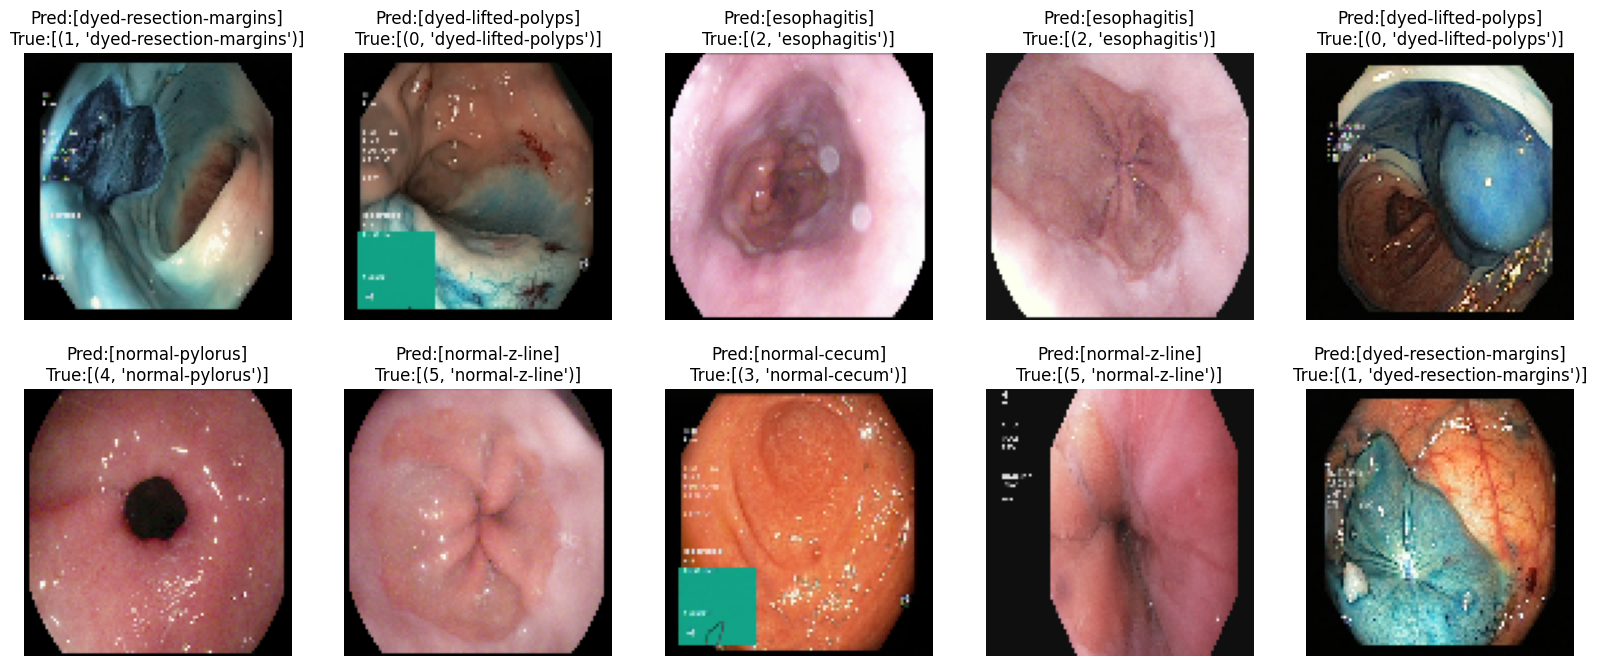

In [30]:
# Predicting randomly chosen images and compare the prediction with the ground truth
def predict_category_img(img, model, categories):
    try:
        img = img[None, :, :, :]
    except:
        raise TypeError("Test image dimension != 3")
    predict = model.predict(img)
    idx_cat = np.argmax(predict, axis=1)[0]
    return idx_cat, categories[idx_cat]

# Function to display randomly chosen images and their predictions
def display_random_predictions(model, categories, X, y, num_images=10):
    plt.figure(figsize=(20, 8))
    for i in range(num_images):
        idx = np.random.randint(len(y))
        img = X[idx]
        pred_class_idx, pred_class = predict_category_img(img, model, categories)
        true_class = y[idx], categories[y[idx]]

        plt.subplot(2, 5, i + 1)
        plt.imshow(img[:, :, ::-1])
        plt.title(f"Pred:[{pred_class}]\nTrue:[{true_class}]")
        plt.axis("off")
    plt.show()

# Displaying predictions for ResNet50
display_random_predictions(model_resnet50, categories, X, y)

The ResNet50 model has accurately predicted all of the labels for the randomly chosen images.

In [31]:
from keras.models import load_model

# Saving the ResNet50 model
model_resnet50.save("resnet50_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Now we can use this saved model to make a Streamlit app for  Gastrointestinal Disease Detection.